In [1]:
from skimage.color import label2rgb
from data import create_pseudo_image_2d

In [2]:
image, label = create_pseudo_image_2d(width=256, height=256, noise_max=0.5, num_seg_classes=1, shape_type='circle')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2020)

import torch

(-0.5, 255.5, 255.5, -0.5)

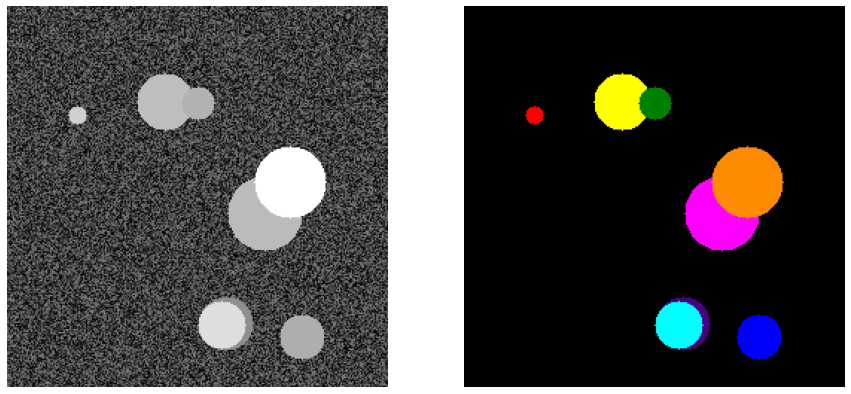

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
plt.gray()

axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(label2rgb(label, bg_label=0))
axes[1].axis('off')

(-0.5, 255.5, 255.5, -0.5)

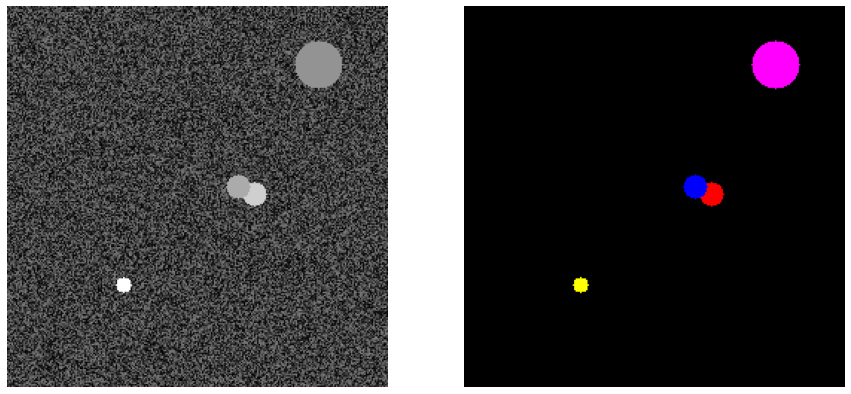

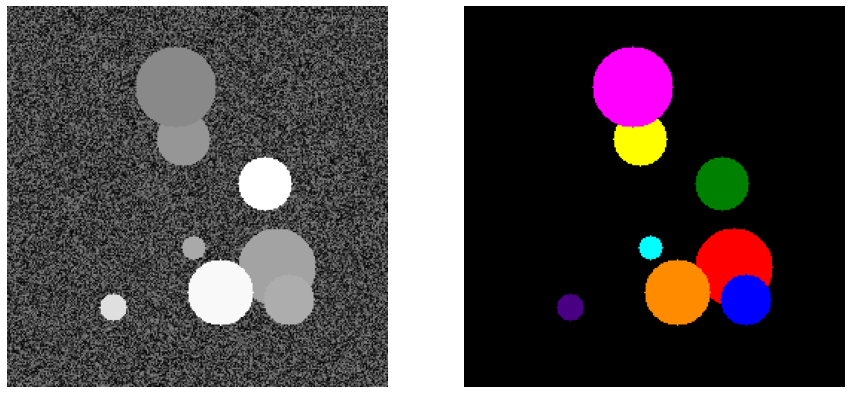

In [5]:
image1, label1 = create_pseudo_image_2d(width=256, height=256, noise_max=0.5, num_seg_classes=1, num_objs=4, shape_type='circle')
image2, label2 = create_pseudo_image_2d(width=256, height=256, noise_max=0.5, num_seg_classes=1, num_objs=8, shape_type='circle')

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
plt.gray()

axes[0].imshow(image1)
axes[0].axis('off')
axes[1].imshow(label2rgb(label1, bg_label=0))
axes[1].axis('off')

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
plt.gray()

axes[0].imshow(image2)
axes[0].axis('off')
axes[1].imshow(label2rgb(label2, bg_label=0))
axes[1].axis('off')

In [6]:
# output, counts = torch.unique(torch.from_numpy(label1), return_counts=True)
# print(output)
# print(counts)

# output, counts = torch.unique(torch.from_numpy(label2), return_counts=True)
# print(output)
# print(counts)

# import torch 
# concat = torch.cat([torch.from_numpy(label1).view(1, 1, 256, 256), 
#                     torch.from_numpy(label2).view(1, 1, 256, 256)], dim=0)
# print(concat.shape)

In [7]:
# output, counts = torch.unique(concat, return_counts=True)
# print(output)
# print(counts)

In [8]:
# output, counts = np.unique((label1).reshape(1, -1), return_counts=True, axis=1)
# print(output)
# print(counts)
# output, counts = np.unique((label2).reshape(1, -1), return_counts=True, axis=1)
# print(output)
# print(counts)
# output, counts = np.unique(concat.reshape(2, -1), return_counts=True, axis=1)
# print(output)
# print(counts)
# plt.imshow(label2rgb(concat[0].reshape(256, 256)))
# plt.show()
# plt.imshow(label2rgb(concat[1].reshape(256, 256)))
# plt.show()

In [9]:
# output, counts = torch.unique(torch.from_numpy(label1).view(1, -1), return_counts=True, dim=1)
# print(output)
# print(counts)
# output, counts = torch.unique(torch.from_numpy(label2).view(1, -1), return_counts=True, dim=1)
# print(output)
# print(counts)
# output, counts = torch.unique((concat).view(2, -1), return_counts=True, dim=1)
# print(output)
# print(counts)
# plt.imshow(concat[0].view(256, 256).numpy())
# plt.show()
# plt.imshow(concat[1].view(256, 256).numpy())
# plt.show()